In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv('AMZN.csv')

data

Date        Open        High         Low       Close   Adj Close  \
0     1997-05-15    0.121875    0.125000    0.096354    0.097917    0.097917   
1     1997-05-16    0.098438    0.098958    0.085417    0.086458    0.086458   
2     1997-05-19    0.088021    0.088542    0.081250    0.085417    0.085417   
3     1997-05-20    0.086458    0.087500    0.081771    0.081771    0.081771   
4     1997-05-21    0.081771    0.082292    0.068750    0.071354    0.071354   
...          ...         ...         ...         ...         ...         ...   
6511  2023-03-30  101.550003  103.040001  101.010002  102.000000  102.000000   
6512  2023-03-31  102.160004  103.489998  101.949997  103.290001  103.290001   
6513  2023-04-03  102.300003  103.290001  101.430000  102.410004  102.410004   
6514  2023-04-04  102.750000  104.199997  102.110001  103.949997  103.949997   
6515  2023-04-05  103.910004  103.910004  100.750000  101.099998  101.099998   

          Volume  
0     1443120000  
1      294000000  
2      122136000  
3      109344000  
4      377064000  
...          ...  
6511    53633400  
6512    56704300  
6513    41135700  
6514    48662500  
6515    45103000  

[6516 rows x 7 columns]

For data manipulation and visualization, this code imports pandas, numpy, and matplotlib libraries. In addition, it imports torch and torch.nn, which are Python libraries for deep learning. 
Using the pandas library, the following code reads a CSV file named 'AMZN.csv' and stores the data in a variable named 'data'. It is likely that the CSV file contains information about Amazon's stock prices. 
Executing this code loads the data from the CSV file into your program, making it available for further analysis.

In [ ]:
data = data[['Date', 'Close']]
data

Date       Close
0     1997-05-15    0.097917
1     1997-05-16    0.086458
2     1997-05-19    0.085417
3     1997-05-20    0.081771
4     1997-05-21    0.071354
...          ...         ...
6511  2023-03-30  102.000000
6512  2023-03-31  103.290001
6513  2023-04-03  102.410004
6514  2023-04-04  103.949997
6515  2023-04-05  101.099998

[6516 rows x 2 columns]

'data' is assumed to be a pandas DataFrame containing financial data, such as Amazon's stock price. 

Data[['Date', 'Close']]` selects only two columns from the DataFrame, namely 'Date' and 'Close'. The operation creates a new DataFrame containing only these two columns and assigns it back to 'data'. 
In this code, you are filtering the original DataFrame to keep only the 'Date' and 'Close' columns, discarding any other columns. You can use this operation to analyze or visualize these specific columns.

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

The code assigns a value to the variable named 'device' based on the availability of a CUDA-enabled GPU (Graphics Processing Unit). 

Torch.cuda.is_available() checks if a CUDA-enabled GPU is available. The 'device' variable is assigned the value 'cuda:0' if it is. GPU device 'cuda:0' represents the first GPU available. A CUDA-enabled GPU is not available, so the value 'cpu' is assigned to 'device', indicating that the computation will be performed by the CPU (Central Processing Unit). 
Using this code, you determine which device (either GPU or CPU) will be used for PyTorch computations. If GPU acceleration is available, certain deep learning computations can be significantly accelerated.

<ipython-input-5-27440ea654b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


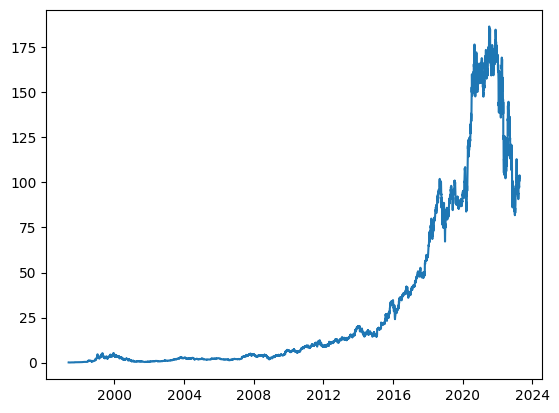

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

plt.plot(data['Date'], data['Close'])

Matplotlib is used to perform data preprocessing and generate a plot. 
Pd.to_datetime(data['Date'])` converts the 'Date' column of the DataFrame 'data' into a datetime format. Various time-related operations and plotting capabilities are enabled by this conversion. 
This code creates a plot using the matplotlib library by calling plt.plot(data['Date'], data['Close']). An x-axis plots the 'Date' column and an y-axis plots the 'Close' column. Over time, the 'Close' column represents Amazon's stock closing prices. 
You can visualize and interpret the data by transforming the 'Date' column into a datetime format. This plot displays Amazon's stock prices over time, providing insight into its historical performance.

In [ ]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

Close  Close(t-1)  Close(t-2)  Close(t-3)  Close(t-4)  \
Date                                                                     
1997-05-27    0.079167    0.075000    0.069792    0.071354    0.081771   
1997-05-28    0.076563    0.079167    0.075000    0.069792    0.071354   
1997-05-29    0.075260    0.076563    0.079167    0.075000    0.069792   
1997-05-30    0.075000    0.075260    0.076563    0.079167    0.075000   
1997-06-02    0.075521    0.075000    0.075260    0.076563    0.079167   
...                ...         ...         ...         ...         ...   
2023-03-30  102.000000  100.250000   97.239998   98.040001   98.129997   
2023-03-31  103.290001  102.000000  100.250000   97.239998   98.040001   
2023-04-03  102.410004  103.290001  102.000000  100.250000   97.239998   
2023-04-04  103.949997  102.410004  103.290001  102.000000  100.250000   
2023-04-05  101.099998  103.949997  102.410004  103.290001  102.000000   

            Close(t-5)  Close(t-6)  Close(t-7)  
Date                                            
1997-05-27    0.085417    0.086458    0.097917  
1997-05-28    0.081771    0.085417    0.086458  
1997-05-29    0.071354    0.081771    0.085417  
1997-05-30    0.069792    0.071354    0.081771  
1997-06-02    0.075000    0.069792    0.071354  
...                ...         ...         ...  
2023-03-30   98.709999   98.699997  100.610001  
2023-03-31   98.129997   98.709999   98.699997  
2023-04-03   98.040001   98.129997   98.709999  
2023-04-04   97.239998   98.040001   98.129997  
2023-04-05  100.250000   97.239998   98.040001  

[6509 rows x 8 columns]

To create a modified DataFrame, this code defines a function called 'prepare_dataframe_for_lstm'. 
From copy import deepcopy as dc imports the 'deepcopy' function from the 'copy' module and renames it 'dc'. The purpose of this function is to create a deep copy of the DataFrame, ensuring that any modifications made to the copied DataFrame do not affect the original DataFrame. 
'prepare_dataframe_for_lstm' takes two arguments: 'df', a DataFrame, and 'n_steps', the number of previous steps or lookback period to consider. 
This function makes a deep copy of the input DataFrame, 'df', so any changes made within it will not affect the original DataFrame. 
This line sets the 'Date' column as the DataFrame's index, making it easier to manipulate and analyze data based on dates. 
To iterate from 1 to 'n_steps' (inclusive), a 'for' loop is used. DF[f'Close(t-[i])'] = DF['Close'].shift(i) creates a new column in the DataFrame, representing 'Close' prices shifted by 'i' periods. As a result, historical prices leading up to the current time step can be captured. 
The code `df.dropna(inplace=True)` removes rows containing missing values (NaNs). The shifting of values creates NaN entries for the initial rows of 'n_steps'. 
The function returns the modified DataFrame as its output. 
This line indicates the value 7 of the variable 'lookback' representing the number of previous time steps to consider in the LSTM (Long Short-Term Memory). 
The line `shifted_df = prepare_dataframe_for_lstm(data, lookback)` calls the 'prepare_dataframe_for_lstm' function with 'data' DataFrame and 'lookback' value. A modified DataFrame is assigned to the variable 'shifted_df'. 
As a result of executing this code, you create a modified DataFrame that includes columns representing historical 'Close' prices. The modified DataFrame can then be used for further analysis or input into an LSTM model for time series forecasting or analysis.

In [ ]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[7.91670000e-02, 7.50000000e-02, 6.97920000e-02, ...,
        8.54170000e-02, 8.64580000e-02, 9.79170000e-02],
       [7.65630000e-02, 7.91670000e-02, 7.50000000e-02, ...,
        8.17710000e-02, 8.54170000e-02, 8.64580000e-02],
       [7.52600000e-02, 7.65630000e-02, 7.91670000e-02, ...,
        7.13540000e-02, 8.17710000e-02, 8.54170000e-02],
       ...,
       [1.02410004e+02, 1.03290001e+02, 1.02000000e+02, ...,
        9.80400010e+01, 9.81299970e+01, 9.87099990e+01],
       [1.03949997e+02, 1.02410004e+02, 1.03290001e+02, ...,
        9.72399980e+01, 9.80400010e+01, 9.81299970e+01],
       [1.01099998e+02, 1.03949997e+02, 1.02410004e+02, ...,
        1.00250000e+02, 9.72399980e+01, 9.80400010e+01]])

The following code converts a pandas DataFrame, 'shifted_df', into a NumPy array. 
As shown in the code, shifted_df_as_np = shifted_df.to_numpy() converts the 'shifted_df' DataFrame into a NumPy array using pandas' 'to_numpy()' function. The function converts the DataFrame's values, including the index and column labels, into a two-dimensional array. 
'shifted_df_as_np' contains the same data as the original DataFrame, but in a different data structure. NumPy's array operations and functions can be used to manipulate the array. 
This code generates a NumPy array representation of the DataFrame, which can be used to perform various numerical computations, apply machine learning algorithms, or utilize specific NumPy features and capabilities.

In [ ]:
shifted_df_as_np.shape

(6509, 8)

The following line of code retrieves the shape or dimensions of the NumPy array 'shifted_df_as_np'. 
An array's shape is determined by its '.shape' attribute, which is the number of rows and columns. 

'shifted_df_as_np.shape' returns a tuple containing the number of rows and columns in the 'shifted_df_as_np' array. 
In addition to understanding the array structure, this information can be used to determine the size and structure of the data it represents. By using its dimensions, you can programmatically access and manipulate specific elements or subsets of the array.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99991063, -0.99995531, -1.        , ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99993855, -0.99991063, -0.99994415, ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99995253, -0.99993855, -0.99989946, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.09747299,  0.10690997,  0.09308121, ...,  0.0506149 ,
         0.05158   ,  0.05779984],
       [ 0.11398769,  0.09747299,  0.10691495, ...,  0.04203581,
         0.0506149 ,  0.05158   ],
       [ 0.08342464,  0.11398769,  0.09747802, ...,  0.07431453,
         0.04203581,  0.0506149 ]])

A MinMaxScaler from the scikit-learn library is used to scale the NumPy array 'shifted_df_as_np'. 
The line of code 'from sklearn.preprocessing import MinMaxScaler' imports the MinMaxScaler class from scikit-learn's preprocessing module. Scaling numerical features to a specific range is commonly achieved using the MinMaxScaler. 
This line creates an instance of the MinMaxScaler class with a feature range of (-1,1) by setting scaler = MinMaxScaler(feature_range=(-1,1)). After scaling, the array's values will fit within a range of -1 to 1. 
The line `shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)` applies the scaling transformation to the array 'shifted_df_as_np'. Scaler objects use the 'fit_transform' method to fit the scaler to the data and then apply the scaling transformation to the array, replacing the original values with the scaled ones. 
With this code, the numerical values in the 'shifted_df_as_np' array are transformed and scaled to fit within the specified feature range. In machine learning tasks, scaling features to a specific range can improve the performance and stability of certain algorithms, especially those that are sensitive to scale. It is then possible to analyze or model the resulting scaled array, 'shifted_df_as_np'.

In [ ]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((6509, 7), (6509,))

A data split is performed on the 'shifted_df_as_np' array to separate the input features (X) and the target variables (Y). 
The line of code `X = shifted_df_as_np[:, 1:]` extracts the input features from the array 'shifted_df_as_np'. By excluding the first column, it selects all rows of the array and all columns starting from index 1. Input features will be assigned to 'X' in the resulting array. 
The line `y = shifted_df_as_np[:, 0]` extracts the target variable from the array 'shifted_df_as_np'. All rows of the array are selected, but only the first column (index 0) is selected. Assigning the target variable to 'y', the resulting array contains the input features. 
The following line retrieves the shapes or dimensions for the arrays 'X' and 'y'. 
In the 'X' array, the expression 'X.shape' returns a tuple with two values, representing rows and columns. It provides information about the size and structure of the input features. 
As with 'y.shape', 'y.shape' returns a tuple with one value, representing the number of elements or rows in 'y'. The size of the target variable is indicated here. 
Upon executing this code, you split the 'shifted_df_as_np' array into two separate arrays, 'X' and 'y', representing the input features and target variable, respectively. These arrays can be used for a variety of machine learning tasks, including training models or further analysis. By retrieving the dimensions of these arrays, the 'X.shape' and 'Y.shape' expressions can provide insight into their size and structure.

In [ ]:
X = dc(np.flip(X, axis=1))
X

array([[-0.99969839, -0.99982128, -0.99983244, ..., -0.99998325,
        -1.        , -0.99995531],
       [-0.99982128, -0.99983244, -0.99987154, ..., -1.        ,
        -0.99994415, -0.99991063],
       [-0.99983244, -0.99987154, -0.99998325, ..., -0.99994415,
        -0.99989946, -0.99993855],
       ...,
       [ 0.05779984,  0.05158   ,  0.0506149 , ...,  0.07431453,
         0.09308121,  0.10690997],
       [ 0.05158   ,  0.0506149 ,  0.04203581, ...,  0.09308121,
         0.10691495,  0.09747299],
       [ 0.0506149 ,  0.04203581,  0.07431453, ...,  0.10691495,
         0.09747802,  0.11398769]])

By flipping the columns of the 'X' array in reverse order, this code transforms the array. 
To flip the columns of the array 'X', the code uses np.flip from the NumPy library. 'axis=1' specifies that the flipping operation should be applied along the columns. 
The flipped array is then assigned back to 'X'. It ensures that the flipped array is a separate copy and does not affect the original array 'X' by using the 'dc' function, which is a shorthand for 'deepcopy'. 
This code reverses the order of the columns in the array 'X'. In certain applications, such as time series analysis or sequence modeling, the order of the input features may be significant or dependent. 
As a result, the flipped array, 'X', can be used for further analysis or modeling.

In [ ]:
split_index = int(len(X) * 0.95)

split_index

6183

For dividing data into training and validation sets, this code calculates the split index based on the length of the 'X' array. 
The line of code `split_index = int(len(X) * 0.95)` calculates the split index by multiplying 'X' by 0.95. 0.95 represents the proportion of data that will be used for training. 
'len(X)' returns the number of rows or elements in the array 'X'. When this length is multiplied by 0.95, a fractional index position indicates where training and validation data should be split. 
After the split index has been determined, it is assigned to the variable 'split_index', representing the position in the 'X' array where the data will be divided for training and validation. 
This code determines the index position within the 'X' array that separates the data into two parts. Typically, 95% of the data is used for training, and 5% for testing or validation. Using the split index value, the 'X' array can be divided into separate training and validation sets, allowing for independent evaluations.

In [ ]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6183, 7), (326, 7), (6183,), (326,))

Separate training and testing sets are created by splitting the 'X' and 'Y' arrays. 
It selects a subset of rows from the 'X' array, starting at the first row and continuing up to (but not including) the 'split_index' value. A subset of these rows is assigned to the 'X_train' variable, which represents the training set. 
X_test = X[split_index:] selects a subset of rows from the 'X' array, starting at the 'split_index' value and continuing until the end. Input features for testing are assigned to the 'X_test' variable. 
Similarly, the lines `y_train = y[:split_index]` and `y_test = y[split_index:]` also split the 'y' array. The training and testing sets of the target variable are represented by separate variables 'y_train' and 'y_test'. 
This next line retrieves the shapes or dimensions of the arrays 'X_train', 'X_test', 'y_train', and 'y_test'. 
Using this code, you divide the 'X' and 'Y' arrays into two sets: 'X_train' and 'X_test' for input features, and 'y_train' and 'y_test' for target variables. Splits are based on the 'split_index' value, which determines the separation point between arrays. Using the resulting subsets, machine learning models can be trained and tested independently, allowing independent evaluation and validation. The expressions 'X_train.shape', 'X_test.shape', 'Y_train.shape', and 'Y_test.shape' provide information about the sizes and structures of these arrays.

In [ ]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6183, 7, 1), (326, 7, 1), (6183, 1), (326, 1))

For certain machine learning models or algorithms, this code reshapes input features and target variables to match the desired format. 
This line of code reshapes the 'X_train' array into a three-dimensional array with dimensions (-1, lookback, 1). Based on the array size, the '-1' value is automatically calculated as a placeholder. The 'lookback' value represents the number of previous time steps considered, while the '1' indicates that each time step has a single feature. 
Similarly, the line `X_test = X_test.reshape((-1, lookback, 1))` ensures that the 'X_test' array is reshaped in the same manner as 'X_train', ensuring consistency. 
As follows, `y_train = y_train.reshape((-1, 1))` and `y_test = y_test.reshape((-1, 1))` reshape the 'y_train' and 'y_test' arrays, respectively. By converting one-dimensional arrays into two-dimensional arrays with a single column, they effectively create column vectors. 
The expressions 'X_train.shape', 'X_test.shape', 'Y_train.shape', and 'Y_test.shape' provide information about the shapes and dimensions of reshaped arrays. 
In this code, the input feature and target variable arrays are modified to match certain machine learning models' expected input formats. When working with specific model architectures, such as recurrent neural networks (RNNs) or convolutional neural networks (CNNs), input data needs to be reshaped. As a result, 'X_train', 'X_test', 'Y_train', and 'Y_test' can be used as inputs to these models.

In [ ]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([6183, 7, 1]),
 torch.Size([326, 7, 1]),
 torch.Size([6183, 1]),
 torch.Size([326, 1]))

In this code, input features and target variables are converted into PyTorch tensors and their shapes are retrieved. 
A PyTorch tensor is created by converting the array 'X_train' to torch.tensor(X_train).float(). 'torch.tensor' creates a tensor from the array, and 'float()' ensures that the tensor has a floating-point data type. 
This line converts the 'y_train' array into a PyTorch tensor, the same process as for the 'X_train' array. 
'X_test' and 'y_test' are converted using torch.tensor(X_test).float() and torch.tensor(y_test).float(), respectively. 
'X_train.shape', 'X_test.shape', 'Y_train.shape', and 'Y_test.shape' retrieve the shapes or dimensions of the tensors. 
The code converts input features and target variables into PyTorch tensors, which are multi-dimensional arrays optimized for numerical computations. PyTorch uses tensors to train and evaluate deep learning models. PyTorch models and operations can use the resulting tensors, 'X_train', 'X_test', and 'y_train'. 'X_train.shape', 'X_test.shape', 'Y_train.shape', and 'Y_test.shape' retrieve the dimensions of these tensors, providing information about their sizes and structures.

In [ ]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

As a result of inheriting from PyTorch's 'Dataset' class, this code defines a custom dataset class called 'TimeSeriesDataset'. 
This line of code imports the 'Dataset' class from torch.utils.data, which is a base class for creating custom datasets in PyTorch. 
There are three main methods in the 'TimeSeriesDataset' class: '__init__', '__len__', and '__getitem__'. 
'__init__' is the class's initializer or constructor. The input features and target variables are represented by two arguments, 'X' and 'y'. The input features are assigned to the 'self.X' attribute, while the target variables are assigned to the 'self.Y' attribute. 
'__len__' returns the length of the dataset, which corresponds to the number of samples or data points. It returns the length of the 'X' attribute in this case. 
The '__getitem__' method retrieves an item or sample from the dataset based on an index 'i'. A tuple containing the 'i'-th element of 'self.X' and 'self.Y' is returned. 
The code creates instances of the TimeSeriesDataset class named 'train_dataset' and 'test_dataset' after defining the class. Each instance is initialized with the 'X_train', 'Y_train', and 'X_test', 'Y_test' datasets. 
This code defines a time series-specific dataset class. By using this class, you can encapsulate and organize input features and target variables. 'train_dataset' and 'test_dataset' instances can be used with PyTorch's data loaders and other utilities for efficient data handling.

In [ ]:
train_dataset

The code snippet 'train_dataset' refers to an instance of the custom dataset class 'TimeSeriesDataset' created earlier. 
It returns the 'train_dataset' object, which represents the training dataset for a time series problem. 
Within the 'TimeSeriesDataset' class structure, the 'train_dataset' instance contains the input features and corresponding target variables for the training set. 
Data loaders, model training routines, or evaluation procedures can use this dataset object as input to various data handling and training processes. 
With the 'train_dataset' object, you can access and manipulate training data efficiently for time series analysis and modeling.

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Data loaders are created for the training and testing datasets using the DataLoader class from the 'torch.utils.data' module. 
From torch.utils.data import DataLoader, the DataLoader class is imported, which is a PyTorch utility for loading and batching data. 
During training or evaluation, the variable 'batch_size' is set to 16, which indicates how many samples will be processed in each batch. 
Train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) creates a data loader named 'train_loader' for the training dataset. To randomly shuffle the samples within each epoch during training, it takes the 'train_dataset' object and the 'batch_size' value as inputs. During training, this introduces randomness and reduces bias. 
As with test_loader, DataLoader(test_dataset, batch_size=batch_size, shuffle=False) creates a data loader named 'test_loader' for testing. As an input, it takes the 'test_dataset' object and 'batch_size' value, and sets 'shuffle=False' to maintain the order of samples during evaluation. By doing so, the model's performance can be evaluated consistently and reproducibly. 
This code creates data loaders for loading and batching data from training and testing datasets. The data loaders can be used in the training and evaluation loops of machine learning models to process data in batches efficiently, improving memory utilization and training efficiency. The 'train_loader' and 'test_loader' objects allow easy iteration over the data during training and evaluation, providing batches of samples each time.

In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


The code iterates over the batches of data from the 'train_loader' data loader. 
The line `for _, batch in enumerate(train_loader):` initiates a loop that cycles over the batches of data in the 'train_loader'. In this case, '_' represents an index or value that is not needed, while 'batch' represents each batch. 
This line assigns the input features and target variables of each batch to the variables 'x_batch' and 'y_batch' in each iteration. It transfers batch data to the device specified by the 'device' variable, which could be a GPU ('cuda') or CPU ('cpu'). 
The line `print(x_batch.shape, y_batch.shape)` prints out the shapes and dimensions of 'x_batch' and 'y_batch'. Information about the current batch's input features and target variables is provided here. 
After the first iteration, the 'break' statement is used to exit the loop. A first batch of data is commonly inspected or some initial checks are performed without iterating over the entire dataset. 
You iterate over the batches of data in the 'train_loader' data loader by executing this code. Input features and target variables are assigned to 'x_batch' and 'y_batch' for each batch. Printing is then done on the shapes of these batches. By doing this, you can verify the sizes and structures of the data within each batch, which can be helpful for understanding the format and characteristics of the data as well as for initial data exploration and debugging.

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

PyTorch is used in this code to create a custom LSTM (Long Short-Term Memory) model. 
A class called LSTM is defined, inheriting from PyTorch's 'nn.Module' class. PyTorch's neural network module can be utilized by the custom class in this way. 
The LSTM model is initialized in the '__init__' method. 'input_size' specifies the size of the input features, 'hidden_size' specifies the number of hidden units in the LSTM layer, and 'num_stacked_layers' specifies the number of stacked layers in the LSTM layer. 
To properly initialize the 'LSTM' class, the 'super().__init__()' line calls the parent class constructor. 
Based on the arguments provided to the '__init__' method, the 'hidden_size' and 'num_stacked_layers' attributes are set. 
This line creates an instance of the LSTM layer, using PyTorch's 'nn.LSTM' class, using input_size, hidden_size, num_stacked_layers, batch_first=True. To expect batch-first input data, it specifies the input size, hidden size, number of stacked layers, and batch_first=True. 
This line creates a linear layer using the 'nn.Linear' class by setting self.fc = nn.Linear(hidden_size, 1). The input size is specified as 'hidden_size' and the output size is 1. 
LSTM forward passes are defined by the 'forward' method. The computations are performed on the input tensor 'x' and the output is generated. 
As part of the 'forward' method, the batch size is determined by the formula `batch_size = x.size(0)`. 
It is necessary to initialize the hidden state and cell state of the LSTM layer as tensors of zeros by using the following formula: `h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)` and `c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)`. 
A tensor 'x' is passed through the LSTM layer using `out, _ = self.lstm(x, (h0, c0))`. The forward pass of the LSTM layer is computed here, resulting in the output tensor 'out'. 
The output tensor is then passed through the linear layer using self.fc(out[:, -1, :]). LSTM outputs are indexed by the time step of last time step, and then mapped to a single output using the linear layer. 
The 'forward' method returns the output tensor 'out'. 
In this example, 'model' is an instance of the 'LSTM' class with input size 1, hidden size 4, and one stacked layer. 
A model is moved to the specified device, which could be a GPU ('cuda') or CPU ('cpu'). 
Using PyTorch, this code defines a custom LSTM model architecture. For time series forecasting or sequence modeling, this model can be used. 'model' represents the configured LSTM model, ready for further training, evaluation, or prediction.

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

'train_one_epoch' defines a function that trains the model for a single epoch or iteration. 
'train_one_epoch' starts by setting the model to training mode with `model.train(True)`. Activating certain operations, such as dropout, ensures that the model is ready for training. 
The line `print(f'Epoch: {epoch + 1}')` is used to print the current epoch number, which shows how the training process is progressing. 
Running_loss is initialized to 0.0, which keeps track of cumulative loss across batches. 
As a result, the function enters a loop that iterates over the batches of data in the 'train_loader'. 
In each batch, input features and target variables are assigned to 'x_batch' and 'y_batch', respectively, and are transferred to the specified device using `to(device)`. 
In order to obtain the predicted output, the model is called with 'x_batch' as input. 
Using the specified loss function, the loss between the predicted output and the target variables is computed and added to the variable 'running_loss'. 
For the next step of backpropagation, the optimizer's gradients are reset to zero using optimizer.zero_grad(). 
To compute and store the gradients of model parameters, the loss is backpropagated through the model using loss.backward(). 
As a result, the model's parameters are updated using `optimizer.step()`, applying the computed gradients. 
The conditional statement [if batch_index % 100 == 99] checks if the current batch index is a multiple of 100 within the loop. The average loss over the previous 100 batches is printed using this condition. 
The average loss is calculated by dividing the 'running_loss' by 100 and printed along with the current batch index. 
This statement is added after the loop to improve readability by adding an empty print() statement. 
This code defines a function that iterates over the training data in batches to train the model for one epoch. In each iteration, the model performs forward and backward propagation, updates the parameters, and calculates the loss. To provide feedback on the training progress, the function prints the average loss every 100 batches.

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

Using the testing data, this code defines a function called 'validate_one_epoch' that validates or evaluates the model for one epoch. 
Validate_one_epoch begins by setting the model to evaluation mode using model.train(False). In this way, operations such as dropout are deactivated, which ensures the model is in the appropriate evaluation mode. 
As part of the validation process, a variable called 'running_loss' is initialized to 0.0, which keeps track of the cumulative loss across batches. 
In the loop, the function iterates over the batches of data in the 'test_loader'. 
The input features and target variables are assigned to 'x_batch' and 'y_batch', respectively, and are moved to the specified device using `to(device)`. 
With 'x_batch' as input, the model produces its output. During the validation phase, the 'torch.no_grad()' context manager is used to temporarily disable gradient calculation and backpropagation. 
In the 'running_loss' variable, the loss between the predicted output and the target variables is calculated using the specified loss function. 
The average loss across the batches is calculated by dividing 'running_loss' by the number of batches in the 'test_loader'. 
After printing the average loss using the print function, we see the validation loss for the current epoch. 
To improve readability, we use the following lines to provide visual separation and add newlines. 
Using this code, you define a function that validates or evaluates the model for one epoch using the testing dataset. It iterates over the testing data in batches, calculates the loss between the predicted output and the target variables, and accumulates the loss. During validation, the average loss is calculated and printed, providing feedback on the model's performance.

In [ ]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.236
Batch 200, Loss: 0.077
Batch 300, Loss: 0.038

Val Loss: 0.047
***************************************************

Epoch: 2
Batch 100, Loss: 0.009
Batch 200, Loss: 0.006
Batch 300, Loss: 0.003

Val Loss: 0.011
***************************************************

Epoch: 3
Batch 100, Loss: 0.002
Batch 200, Loss: 0.001
Batch 300, Loss: 0.001

Val Loss: 0.007
***************************************************

Epoch: 4
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001
Batch 300, Loss: 0.001

Val Loss: 0.005
***************************************************

Epoch: 5
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.004
***************************************************

Epoch: 6
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.004
***************************************************

Epoch: 7
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.004
*****************

Using a given learning rate, loss function, and optimizer, this code trains and validates the model. 
The variable 'learning_rate' is set to 0.001, which is used to determine how frequently the optimizer updates the model parameters. 
'num_epochs' is set to 10, indicating the total number of passes over the training data. 
'loss_function' specifies the mean squared error (MSE) loss, which measures the discrepancy between predicted and target values in regression problems. 
As arguments, the model parameters and the learning rate are passed to the optimizer using the Adam optimization algorithm. Adam optimizers are popular for training neural networks because they combine adaptive learning rates and momentum. 
As a result, the loop `for epoch in range(num_epochs):` iterates over the range of epochs, starting from 0 and ending at 'num_epochs - 1'. 
In each epoch, the 'train_one_epoch' function is called to train the model. During training, this function performs forward and backward propagation, updates the model parameters, and prints the average loss for each batch. 
Using the testing data, the 'validate_one_epoch' function evaluates the model's performance after one epoch of training. Calculates and prints the average loss for the testing dataset. 
This code trains and validates the model for the specified number of epochs. Each epoch, the model is trained using training data, and its performance is evaluated using testing data. Over time, the model learns and improves as it repeats the process for the designated number of epochs.

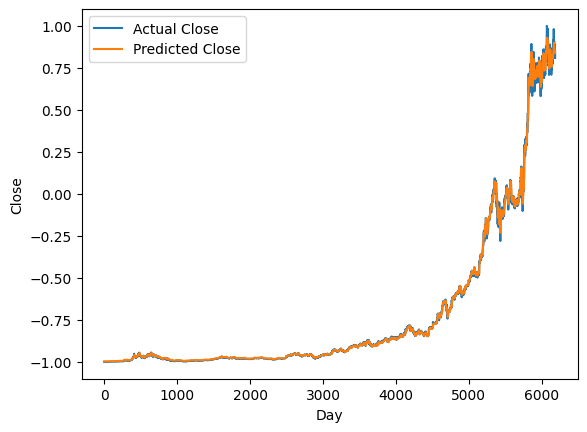

In [ ]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


The code generates a plot comparing the actual and predicted values of the "Close" variable. 
With torch.no_grad(), gradient calculation and backpropagation are disabled. In this case, we only want to make forward passes through the model without updating any parameters or calculating gradients. 
The line `predicted = model(X_train.to(device)).to('cpu').numpy()` applies the trained model to the training data in order to determine the predicted values for the "Close" variable. A tensor is moved to the specified device (GPU or CPU) using the to(device) method, and a tensor is retrieved using the to(cpu) method for compatibility with numpy(). For easier plotting, the predictions are converted to a NumPy array. 
In the following lines of code, a line plot is created using the Matplotlib library. A plot of the actual "Close" values from the training dataset can be seen by plotting plt.plot(y_train, label='Actual Close'), while a plot of the predicted "Close" values based on the model can be seen by plotting plt.plot(predicted, label='Predicted Close'). 
PLT.xlabel('Day') and PLT.ylabel('Close') provide labels for the x-axis and y-axis, respectively. 
By calling plt.legend(), a legend is added to the plot, which indicates what the actual and predicted values are. 
To display the plot, plt.show() is called. 
This code generates a line plot comparing the actual and predicted values of the "Close" variable for the training dataset. By observing how well the predicted values match the actual values, you can assess the model's performance.

In [ ]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([  0.3959165 ,   0.39559413,   0.39486046, ..., 172.31433271,
       171.69293455, 171.57329039])

A transformation is applied to the predicted values for the training dataset obtained from the model in this code. 
This line flattens the predicted values obtained from the model, converting them from a multidimensional array to a onedimensional array. In order to facilitate further processing and calculations, this is done. 
It creates an array of zeros called 'dummies' with a shape determined by the number of samples in the training dataset and the 'lookback' value plus one. 
A line that reads `dummies[:, 0] = train_predictions` assigns the 'train_predictions' array to the first column of the 'dummies' array. In the first column, the predicted values replace the zeros. 
Using the scaler object, the following line applies the inverse transformation to dummies. During this step, the 'dummies' array is converted back to its original scale, reversing any scaling or normalization applied earlier. 
The line `train_predictions = dc(dummies[:, 0])` extracts the first column of the 'dummies' array and assigns it to 'train_predictions'. As a result, 'train_predictions' contains the processed and transformed predicted values. 
This code transforms and processes the predicted values for the training dataset. As soon as the values are flattened, they are assigned to the 'dummies' array, inversely transformed to their original scale, and then extracted into 'train_predictions'. Predicted values for the training dataset are stored in the 'train_predictions' array, ready for further analysis and evaluation.

In [ ]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([7.91646265e-02, 7.65634249e-02, 7.52572660e-02, ...,
       1.69091505e+02, 1.73315001e+02, 1.68871003e+02])

The target variable values for the training dataset are processed and transformed in this code. 
It generates an array of zeros called 'dummies' with a shape determined by the number of samples in the training dataset and the 'lookback' value plus one. 
The line `dummies[:, 0] = y_train.flatten()` assigns the flattened target variable values to the first column of the array 'dummies'. Using this method, the zeros in the first column are replaced with the values of the target variables. 
Using the 'scaler' object, the following line applies the inverse transformation to dummies. By reversing any scaling or normalization applied earlier, it returns the 'dummies' array to its original scale. 
Assigning values to 'new_y_train' is done by dividing 'new_y_train' by the values in the first column of the array 'dummies'. In this way, 'new_y_train' contains the training dataset's processed and transformed target variable values. 
This code transforms the target variable values for the training dataset. Using the scaler object, the values are inverse-transformed to their original scale, and then extracted into 'new_y_train'. For further analysis or evaluation, the 'new_y_train' array contains the processed and transformed target variable values for the training dataset.

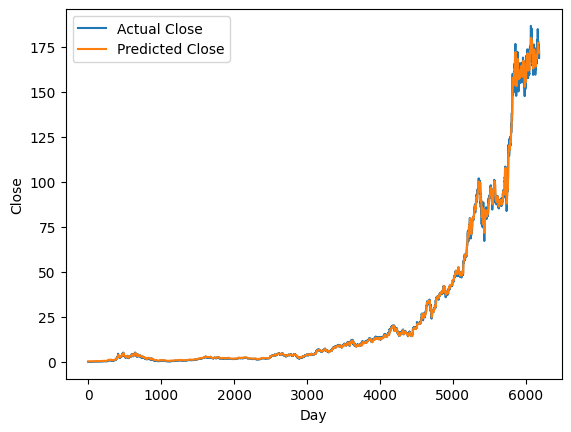

In [ ]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


After processing and transforming the training dataset, this code generates a plot that compares the actual and predicted values of the "Close" variable. 
It plots the 'new_y_train' array, which represents the processed and transformed actual values of the "Close" variable from the training dataset. 
Using the function plot.plot(train_predictions, label='Predicted Close'), the 'train_predictions' array is plotted. This array contains the processed and transformed predicted values for the "Close" variable from the training dataset. 
Afterwards, plot.xlabel('Day') and plot.ylabel('Close') set the labels for the x-axis and y-axis of the plot, respectively, indicating the day and the value of the "Close" variable. 
Adding a legend to a plot by calling plt.legend() adds labels for actual and predicted values to the plot. 
The plot is displayed by calling plt.show(). 
This code generates a line plot that visually compares the processed and transformed actual values ('new_y_train') and predicted values ('train_predictions') of the "Close" variable. With this plot, you can observe how well the predicted values match the actual values, taking into account any preprocessing or transformations performed.

In [ ]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([171.08325847, 170.55666522, 169.91208413, 169.70572769,
       169.93996923, 170.20067855, 170.11732894, 170.23343813,
       170.16056558, 170.00438232, 169.45080437, 169.34104812,
       169.13291864, 168.38625706, 167.3556143 , 166.37399974,
       165.38182475, 165.18253824, 165.17932565, 164.71582821,
       164.34621858, 163.60345324, 162.34830677, 160.32290449,
       156.44371809, 153.05200687, 149.57884692, 146.3243213 ,
       144.09092849, 143.65137544, 145.15828266, 147.38919654,
       149.110475  , 147.96708571, 150.46809103, 153.27319794,
       156.07173514, 158.24490013, 159.49646717, 159.27716586,
       159.28623116, 158.87310143, 158.91031862, 158.33301861,
       157.33195062, 156.01990564, 153.89197266, 153.08889058,
       153.29125072, 153.62528836, 153.61207114, 153.74736698,
       153.11405776, 152.00164389, 148.86957483, 145.42341069,
       143.36465411, 143.85419691, 144.46326716, 144.35618436,
       145.50759958, 148.16584975, 151.40455696, 154.81

The code applies some transformations to the predicted values for the testing dataset obtained from the model. 
The line `test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten() applies the trained model to the test data. A device (GPU or CPU) is specified for moving the 'X_test' data. Using the 'detach()' method, the output tensor is detached from the computation graph, preventing further gradient tracking. The output tensor is then moved to the CPU using CPU(), and the predictions are flattened into one-dimensional arrays using flatten(). 
This line creates an array of zeros called dummies with a shape determined by the number of samples in the test dataset and the 'lookback+1' value. 
Using the test_predictions function, it is possible to assign the predicted values to the first column of the dummies array. In the first column, the predicted values replace the zeros. 
Using the 'scaler' object, the next line uses the inverse transformation on dummies. The code reverts any scaling or normalization applied earlier to the 'dummies' array. 
In this case, test_predictions is set as dc(dummies[:, 0]) and the first column is taken as dummies[:, 0]. The 'test_predictions' variable contains the processed and transformed predicted values for the testing dataset. 
This code transforms and processes the predicted values for the testing dataset. Model values are assigned to the 'dummies' array, inverse-transformed to their original scale using the scaler object, and then extracted into 'test_predictions'. 'test_predictions' contains the processed and transformed predicted values for the testing dataset, ready for analysis and evaluation.

In [ ]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([170.01749949, 167.07899763, 170.41700626, 171.03700377,
       171.0684961 , 169.66949429, 170.66099675, 169.20100565,
       168.64449858, 166.71699707, 170.40449492, 167.52200227,
       164.35699578, 163.25399737, 162.55400179, 161.48599177,
       165.36199892, 165.20699954, 161.21400501, 162.13799851,
       158.91749416, 156.29899568, 151.66749509, 142.64300408,
       144.54400445, 139.98599336, 138.87249844, 139.63749627,
       143.97799855, 149.57350001, 151.19349835, 150.61250219,
       138.84550541, 157.63949825, 157.93550165, 161.41349717,
       161.18949925, 159.003495  , 153.29350176, 155.1670061 ,
       156.51049894, 158.10049453, 154.6524962 , 152.60149876,
       150.19749381, 144.82699629, 151.35800212, 153.78849709,
       153.56300403, 151.14199678, 152.05250627, 147.89849848,
       145.64100565, 137.45300383, 136.01449488, 139.27900567,
       146.81750468, 145.52450739, 141.8529947 , 147.36650272,
       153.10400311, 157.23899657, 161.25050521, 161.49

In this code, the target variable values for the testing dataset are processed and some transformations are applied. 
The line `dummies = np.zeros((X_test.shape[0], lookback+1))` creates an array of zeros called 'dummies' with a shape derived from the number of samples in the test dataset and the 'lookback' value plus one. 
In the 'dummies' array, the flattened target variables values are assigned to the first column by y_test.flatten(). The target variable values are replaced by zeros in the first column. 
Using the 'scaler' object, the following line applies the inverse transformation to the dummies. The code restores the 'dummies' array to its original scale, reversing any scaling or normalization applied earlier. 
In this line, we extract the values from the first column of the 'dummies' array and assign them to 'new_y_test'. In this way, 'new_y_test' contains the values of the processed and transformed target variables. 
As a result of executing this code, the target variable values for the testing dataset are processed and transformed. Using the scaler object, the values are inverse-transformed to their original scale and extracted into 'new_y_test'. 'new_y_test' contains the processed and transformed target variable values for the testing dataset, ready for further analysis.

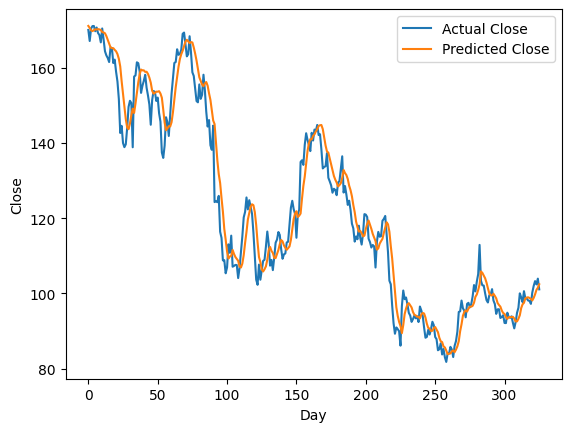

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


Using this code, a plot is generated that compares the actual and predicted values of the "Close" variable for the testing dataset. 
In this example, the line `plt.plot(new_y_test, label='Actual Close')` plots the 'new_y_test' array, which represents the processed and transformed actual values of the "Close" variable from the testing dataset. 
This line plots the array 'test_predictions', which contains the processed and transformed predicted values of the "Close" variable for the testing dataset. 
Next, we will set the labels for the x-axis and y-axis of the plot, specifying the day and the value of the "Close" variable, respectively. 
This statement adds a legend to the plot, labeling the actual and predicted values. 
The plot is displayed by calling plt.show(). 
Executing this code generates a line plot that visually compares the processed and transformed actual values ('new_y_test') and predicted values ('test_predictions') of the "Close" variable. By observing how well the predicted values align with the actual values, you can evaluate the performance of the model.